#**Defining the question.**

**Specifying the analysis question**


To utilize K Nearest Neighbour Machine Learning Technique in predicting passengers who will survive an accident and those who didn't.


#**Metrics for success.**


To create a model that will accurately determine whether or not a passenger survives or not.

#**Experimental design.**


1. Data loading and cleaning
2. Exploratory Data Analysis.
3. Modelling through KNN Test.
4. Hyperparameter Tuning.
5. Challenging the Solution
6. Conclusion

#**Importing Libraries.**

In [5]:
# Importing libraries
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn.metrics import mean_squared_error

#**Loading  dataset.**

In [6]:
df = pd.read_csv('train (5).csv')
df.sample(10)
df1=pd.read_csv('test (1).csv')
df1.sample(10)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
117,1009,3,"Sandstrom, Miss. Beatrice Irene",female,1.00,1,1,PP 9549,16.7000,G6,S
309,1201,3,"Hansen, Mrs. Claus Peter (Jennie L Howard)",female,45.00,1,0,350026,14.1083,NaN,S
121,1013,3,"Kiernan, Mr. John",male,NaN,1,0,367227,7.7500,NaN,Q
384,1276,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
178,1070,2,"Becker, Mrs. Allen Oliver (Nellie E Baumgardner)",female,36.00,0,3,230136,39.0000,F4,S
40,932,3,"Karun, Mr. Franz",male,39.00,0,1,349256,13.4167,NaN,C
354,1246,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,1,2,C.A. 2315,20.5750,NaN,S
349,1241,2,"Walcroft, Miss. Nellie",female,31.00,0,0,F.C.C. 13528,21.0000,NaN,S
109,1001,2,"Swane, Mr. George",male,18.50,0,0,248734,13.0000,F,S
201,1093,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.4000,NaN,S


In [7]:
# Determining the no. of records in our dataset
#
print( df.shape[0])
print(df1.shape[0])

891
418


In [8]:
# Previewing the top of our dataset
#
display(df.head())
display(df1.head())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
# Previewing the bottom of our dataset
#
display(df.tail())
display(df1.tail())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#**Cleaning the Dataset.**

In [11]:
#Checking the data types of the datasets
print("=== Train Set ===")
print(df.dtypes)
print('\n')
print("=== Test Set ===")
print(df1.dtypes)

=== Train Set ===
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


=== Test Set ===
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Text(0.5, 1.0, 'Boxplots')

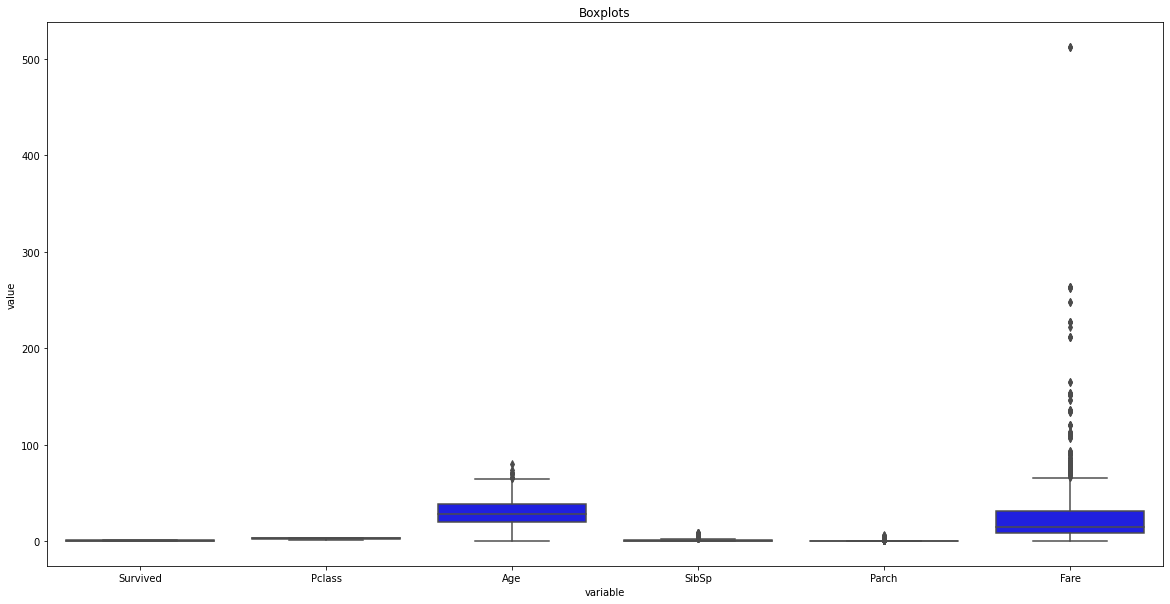

In [12]:
# Checking for Outliers
#
import seaborn as sns
import matplotlib.pyplot as plt

boxplot = pd.DataFrame(data = df, columns = ['Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare'])

plt.figure(figsize=(20,10))

sns.boxplot(x="variable", y="value", data=pd.melt(boxplot), color = 'blue').set_title('Boxplots')
#The fare column has alot of missing values

Since the fare column depends on the ticket class and the distance covered the column exhibited a lot of outliers which need to be removed in order to ensure the fitted KNN model is the best it could ever get as it is very sensitive to outliers.In this case we will remove fare values costing 500.

In [13]:
#Removal of the extreme outliers
df = df[df['Fare'] <= 400 ]
df1 = df1[df1['Fare'] <= 400 ]


In [14]:
# Checking for Anomalies
#
Q1= df.quantile(0.25)
Q3 =df.quantile(0.75)
IQR = Q3-Q1
display('0.25 quartile')
print(Q1)
print('----------------------------------------')
display('0.75 quartile')
print(Q3)
print('----------------------------------------')
display('0.5 quartile')
print(IQR)

'0.25 quartile'

PassengerId    222.7500
Survived         0.0000
Pclass           2.0000
Age             20.0000
SibSp            0.0000
Parch            0.0000
Fare             7.8958
Name: 0.25, dtype: float64
----------------------------------------


'0.75 quartile'

PassengerId    667.25000
Survived         1.00000
Pclass           3.00000
Age             38.00000
SibSp            1.00000
Parch            0.00000
Fare            30.77185
Name: 0.75, dtype: float64
----------------------------------------


'0.5 quartile'

PassengerId    444.50000
Survived         1.00000
Pclass           1.00000
Age             18.00000
SibSp            1.00000
Parch            0.00000
Fare            22.87605
dtype: float64


In [15]:
# Checking for Anomalies
#
Q1= df1.quantile(0.25)
Q3 =df1.quantile(0.75)
IQR = Q3-Q1
display('0.25 quartile')
print(Q1)
print('----------------------------------------')
display('0.75 quartile')
print(Q3)
print('----------------------------------------')
display('0.5 quartile')
print(IQR)

'0.25 quartile'

PassengerId    995.7500
Pclass           1.0000
Age             21.0000
SibSp            0.0000
Parch            0.0000
Fare             7.8958
Name: 0.25, dtype: float64
----------------------------------------


'0.75 quartile'

PassengerId    1204.250000
Pclass            3.000000
Age              39.000000
SibSp             1.000000
Parch             0.000000
Fare             31.415625
Name: 0.75, dtype: float64
----------------------------------------


'0.5 quartile'

PassengerId    208.500000
Pclass           2.000000
Age             18.000000
SibSp            1.000000
Parch            0.000000
Fare            23.519825
dtype: float64


In [16]:
#Dropping unnecessary columns
df.drop(['PassengerId','Name', 'Ticket'], axis = 1) 
df1.drop(['PassengerId','Name', 'Ticket'], axis = 1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,NaN,S
414,1,female,39.0,0,0,108.9000,C105,C
415,3,male,38.5,0,0,7.2500,NaN,S
416,3,male,NaN,0,0,8.0500,NaN,S


In [17]:
# Check for missing values in the train set
df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100
#77.10% of observations in the Cabin column are missing hence we will drop it.
#19.87% of observations in the age column are missing hence we will replace it with the median.
#0.2245%  observations of the embarked column are missing hence we will fill them using the most common value.

Cabin          77.252252
Age            19.932432
Embarked        0.225225
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [18]:
# Check for missing values in the test set
df1.isnull().sum().sort_values(ascending=False) / df1.shape[0] * 100
#78.23% of observations in the Cabin column are missing hence we will drop the column
#20.57% of obseravtions in the age column are missing hence we will replace this with the median
#0.23% of observations in

Cabin          78.365385
Age            20.673077
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.000000
dtype: float64

In [19]:
#dropping cabin column 
df= df.drop('Cabin',axis=1)
# filling Embarked columns with mode  
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# filling age columns with mode  
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])

In [20]:
df=df.drop('Name',axis=1)

In [21]:
df=df.drop('Ticket',axis=1)

# Dropped the two columns this is because they were not useful regarding the analysis to be done.

In [22]:
#Viewing the transformed test dataset
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,24.0,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


In [23]:
#Finding the unique values in every column of the test data
for column in df.columns:
  print(column)

  print(df[column].unique())
  print('\n')

PassengerId
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

In [24]:
#Converting the Sex column to numerical
from sklearn.preprocessing import LabelEncoder
lb_make=LabelEncoder()
df['Sex']=lb_make.fit_transform(df['Sex'])

In [25]:
#Mapping the Embarked column
df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2})

#**Univariate analysis.**

In [26]:
# Determining the distribution of target variable
df['Survived'].value_counts(normalize=True) * 100

0    61.824324
1    38.175676
Name: Survived, dtype: float64

In [27]:

#Getting the summary statistics of the numerical variables
df.describe()



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,445.618243,0.381757,2.313063,0.647523,28.544110,0.524775,0.381757,30.582164,0.359234
std,257.405474,0.486091,0.834007,0.478011,13.215969,1.104186,0.806949,41.176366,0.635660
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,445.500000,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,14.454200,0.000000
75%,667.250000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,30.771850,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000,2.000000


In [28]:

#Getting the Correlation of the variables
df.corr()

# Multicollinearity is okay since they are between the recquired value of 0 and 1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.006916,-0.033005,0.040265,0.035453,-0.056929,-0.002223,-0.002046,-0.032062
Survived,-0.006916,1.000000,-0.334068,-0.545899,-0.055242,-0.033395,0.082157,0.261742,0.102964
Pclass,-0.033005,-0.334068,1.000000,0.132881,-0.355106,0.080937,0.018212,-0.604960,0.051321
Sex,0.040265,-0.545899,0.132881,1.000000,0.073402,-0.114799,-0.247003,-0.222361,-0.117097
Age,0.035453,-0.055242,-0.355106,0.073402,1.000000,-0.231780,-0.155244,0.109819,-0.049473
SibSp,-0.056929,-0.033395,0.080937,-0.114799,-0.231780,1.000000,0.415141,0.211816,-0.058472
Parch,-0.002223,0.082157,0.018212,-0.247003,-0.155244,0.415141,1.000000,0.263910,-0.078641
Fare,-0.002046,0.261742,-0.604960,-0.222361,0.109819,0.211816,0.263910,1.000000,0.035497
Embarked,-0.032062,0.102964,0.051321,-0.117097,-0.049473,-0.058472,-0.078641,0.035497,1.000000


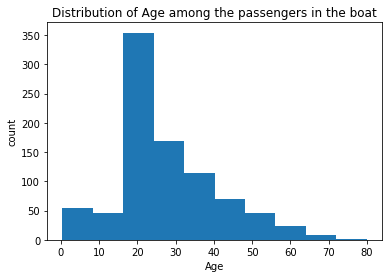

In [33]:
#Finding out the age distribution of the passengers in boat
plt.hist(df.Age)
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Distribution of Age among the passengers in the boat')
plt.show()

# Most passengers were aged 20 years while the least recorded was 80 years

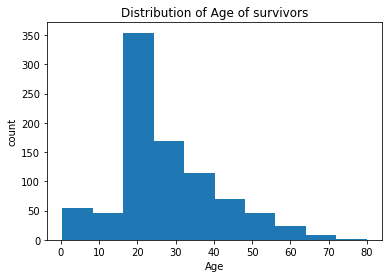

In [34]:
#Finding out the age of survivors
plt.hist(df.Age)
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Distribution of Age of survivors')
plt.show()

# Most survivors were aged 20 years.

#**Bivariate Analysis.**

In [29]:
#From the graph below it is clear that a total of 549 people survived the accident whereas 339 didn't.
import plotly.express as px
fig = px.histogram(df, x="Survived", y="Sex", color="Survived", width=800)
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



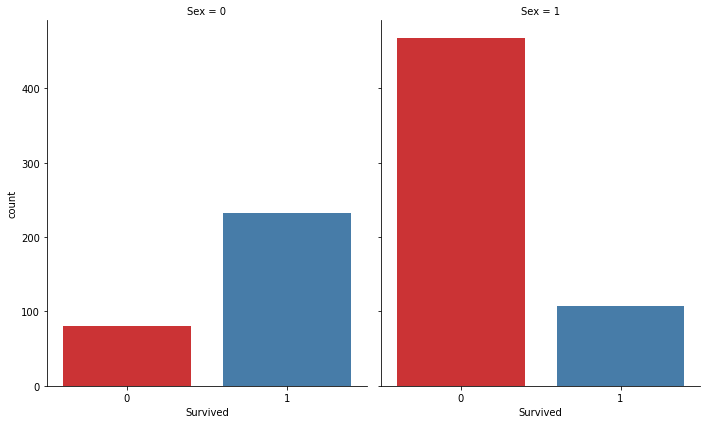

In [30]:
sns.catplot("Survived", col="Sex", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()


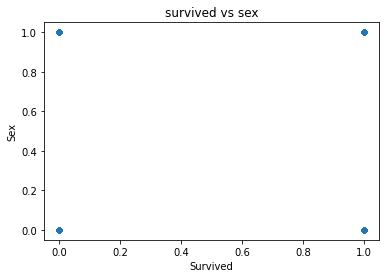

In [71]:
# Using Pandas: Plotting our scatterplot to compare the variables
df.plot(x = 'Survived', y = 'Sex', kind='scatter')
# Giving our scatterplot a title
plt.title('survived vs sex')

# Labelling our x axis
plt.xlabel('Survived')

# Labelling our y axis
plt.ylabel('Sex')

# We then display our scatterplot as shown below
plt.show()

More males survived as compared with women

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



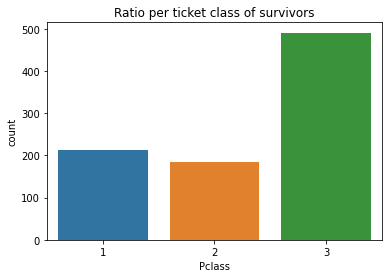

In [32]:
#Ratio of survivors per ticket class
sns.countplot(df.Pclass)
plt.title("Ratio per ticket class of survivors")
plt.show()

Most of the survivors had ticket Class 3 which is expected as most of the passengers had this ticket.

Most passengers were between the age of 15 and 25.

Most of the survivors were also between the age of 15 and 25.

#**Implementing the solution.**

In [35]:
# Implementing the Solution
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [36]:
#Defining our dependent and Independent Variables
X = df.drop(["Survived","PassengerId"],axis=1)
y = np.where(df["Survived"] == True,1,0)

In [37]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [38]:
# Using the 80-20 to train and test the model.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, y_train.shape


((710, 7), (710,))

In [39]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier()

In [40]:
#Training the model.
model = model1.fit(X_train, y_train)

In [41]:
#Predict test data set.
y_pred = model.predict(X_test)

In [42]:
#Checking performance our model with confusion matrix.
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print('\n')

[[84 18]
 [22 54]]




In [43]:
#Checking performance our model with classification report.
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       102
           1       0.75      0.71      0.73        76

    accuracy                           0.78       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.77      0.78      0.77       178



In [44]:

#Checking performance our model with ROC Score.
from sklearn.metrics import roc_auc_score
print('\n')
roc_auc_score(y_test, y_pred)

0.7670278637770898

The accuracy of the model is 76.70% which is a bit low hence we proceed to perform hyperparameter tuning in a bid to improve it.

#**Hyperparameter Tuning.**

In [45]:
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(1,60))
n_neighbors = list(range(1,40))
p=[1,2,3]


In [46]:
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
model_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(model_2, hyperparameters, cv=10)

In [47]:
#Fitting the model
best_model = clf.fit(X,y)

In [48]:
#Printing the best hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 25
Best p: 1
Best n_neighbors: 14


#**Challenging the solution.**

In [49]:
#Fitting the model with the tuned parameters to see if there is any improvement
knn = KNeighborsClassifier(leaf_size=1, n_neighbors=14, p=1)

#Training the model.
model2 = knn.fit(X_train, y_train)

In [50]:
#Making predictions.
y2_pred = model.predict(X_test)

In [51]:
#Checking performance our model with confusion matrix.
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y2_pred))
print('\n')

[[84 18]
 [22 54]]




In [52]:
#Checking performance our model with classification report.
from sklearn.metrics import classification_report
print(classification_report(y_test, y2_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       102
           1       0.75      0.71      0.73        76

    accuracy                           0.78       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.77      0.78      0.77       178



In [53]:
#Checking performance our model with ROC Score.
from sklearn.metrics import roc_auc_score
print('\n')
roc_auc_score(y_test, y2_pred)

0.7670278637770898

After the hyperparameter tuning,the ROC has increased to 76.70%

60-40

In [54]:
# Train using 60% of the data.
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.4, random_state=0)
X2_train.shape, y2_train.shape

((532, 7), (532,))

In [55]:
knn1 = KNeighborsClassifier(leaf_size=1, n_neighbors=14, p=1)

#Training the model.
model2 = knn1.fit(X2_train, y2_train)

#Predict test data set.
y3_pred = model2.predict(X2_test)

In [56]:
#Checking performance our model with confusion matrix.
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y2_test, y3_pred))
print('\n')

[[191  22]
 [ 53  90]]




In [57]:
#Checking performance our model with ROC Score.
from sklearn.metrics import roc_auc_score
print('\n')
roc_auc_score(y2_test, y3_pred)

0.7630421221970517

The ROC is 76.30%

50-50 Ratio

In [58]:
# Train using 50% of the data.
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.5, random_state=0)
X1_train.shape, y1_train.shape

((444, 7), (444,))

In [59]:
knn1 = KNeighborsClassifier(leaf_size=1, n_neighbors=14, p=1)

#Training the model.
model3 = knn1.fit(X1_train, y1_train)

#Predict test data set.
y4_pred = model.predict(X1_test)

In [60]:
#Checking performance our model with confusion matrix.
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y1_test, y4_pred))
print('\n')

[[237  34]
 [ 44 129]]




In [61]:
#Checking performance our model with classification report.
from sklearn.metrics import classification_report
print(classification_report(y1_test, y4_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       271
           1       0.79      0.75      0.77       173

    accuracy                           0.82       444
   macro avg       0.82      0.81      0.81       444
weighted avg       0.82      0.82      0.82       444



In [62]:
#Checking performance our model with ROC Score.
from sklearn.metrics import roc_auc_score
print('\n')
roc_auc_score(y1_test, y4_pred)

0.8101017426359235

The ROC is at 81.01%

70-30 Ratio

In [63]:
# Training the model using 70% of the data.
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.3, random_state=0)
X3_train.shape, y3_train.shape

((621, 7), (621,))

In [64]:
knn2 = KNeighborsClassifier(leaf_size=1, n_neighbors=14, p=1)

#Training the model.
model4 = knn2.fit(X3_train, y3_train)

In [65]:
#Makig Predictions
y5_pred = model.predict(X3_test)

In [66]:
#Checking performance our model with confusion matrix.
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y3_test, y5_pred))
print('\n')

[[138  22]
 [ 27  80]]




In [67]:
#Checking performance our model with classification report.
from sklearn.metrics import classification_report
print(classification_report(y3_test, y5_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       160
           1       0.78      0.75      0.77       107

    accuracy                           0.82       267
   macro avg       0.81      0.81      0.81       267
weighted avg       0.82      0.82      0.82       267



In [68]:
#Checking performance our model with ROC Score.
from sklearn.metrics import roc_auc_score
print('\n')
roc_auc_score(y3_test, y5_pred)

0.8050817757009346

The ROC Value is at 80.51%

#**Conclusion.**


After hyperparameter tuning it was found out that the best model was the 50-50 Split which gave 81.01% ROC value.

#**Recommendations.**


We should deal with the imbalanced data.